<a href="https://colab.research.google.com/github/Roghiehghahremani/Deep-Learning-With-PyTorch---Full-Course_Patrick-Loeber/blob/main/11_SoftMax_CrossEntropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
import torch.nn as nn
import numpy as np

In [6]:
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x),axis = 0)
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)

print(f'soft numpy = ', outputs)

soft numpy =  [0.65900114 0.24243297 0.09856589]


In [8]:
x = torch.tensor([2.0, 1.0 , 0.1])
outputs =  torch.softmax(x, dim = 0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


In [14]:
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

  # y must be one hot encoded
  # if class 0: [1 0 0]
  # if class 1: [0 1 0]
  # if class 2: [0 0 1]

Y = np.array([1, 0, 0])

#y_pred has probabilities
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad  = np.array([0.1, 0.3, 0.6])
l_good = cross_entropy(Y,Y_pred_good)
l_bad = cross_entropy(Y,Y_pred_bad)
print(f'Loss for good case = {l_good:.3f}')
print(f'Loss for bad case = {l_bad:.3f}')

Loss for good case = 0.357
Loss for bad case = 2.303


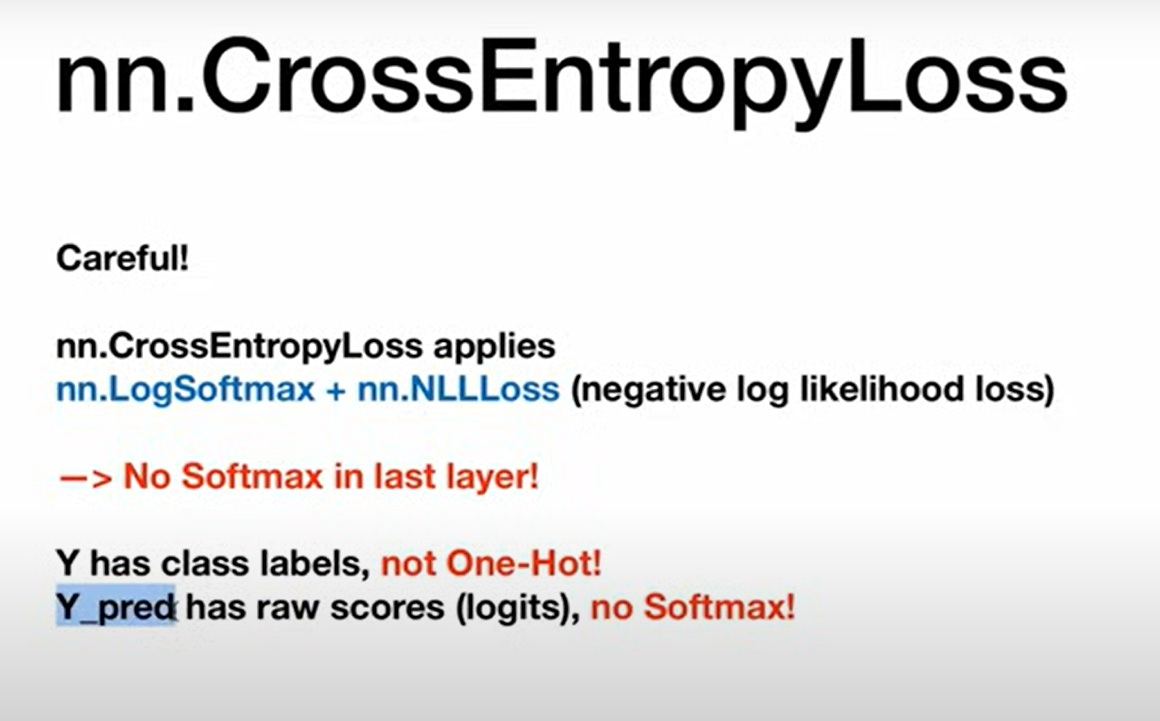

In [23]:
loss = nn.CrossEntropyLoss()

Y = torch.tensor([0])
# nsamples x nclasses = 1 x 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad =  torch.tensor([[0.5, 2.0, 0.3]])

l_good = loss(Y_pred_good,Y)
l_bad =  loss(Y_pred_bad,Y)

print(f'Loss for good case = {l_good:.3f}')
print(f'Loss for bad case = {l_bad:.3f}')

Loss for good case = 0.417
Loss for bad case = 1.841


In [26]:
_,prediction_good = torch.max(Y_pred_good,1)
_,prediction_bad = torch.max(Y_pred_bad,1)
print(prediction_good)
print(prediction_bad)


tensor([0])
tensor([1])


In [27]:
loss = nn.CrossEntropyLoss()
# 3 samples
Y = torch.tensor([2,0,1])
# nsamples x nclasses = 3 x 3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1],[2.0, 1.0, 0.1],[0.1, 3.0, 0.1]])
Y_pred_bad =  torch.tensor([[2.1, 1.0, 0.1],[0.1, 1.0, 2.1],[0.1, 3.0, 0.1]])

l_good = loss(Y_pred_good,Y)
l_bad =  loss(Y_pred_bad,Y)

print(f'Loss for good case = {l_good:.3f}')
print(f'Loss for bad case = {l_bad:.3f}')

_,prediction_good = torch.max(Y_pred_good,1)
_,prediction_bad = torch.max(Y_pred_bad,1)
print(prediction_good)
print(prediction_bad)


Loss for good case = 0.302
Loss for bad case = 1.624
tensor([2, 0, 1])
tensor([0, 2, 1])


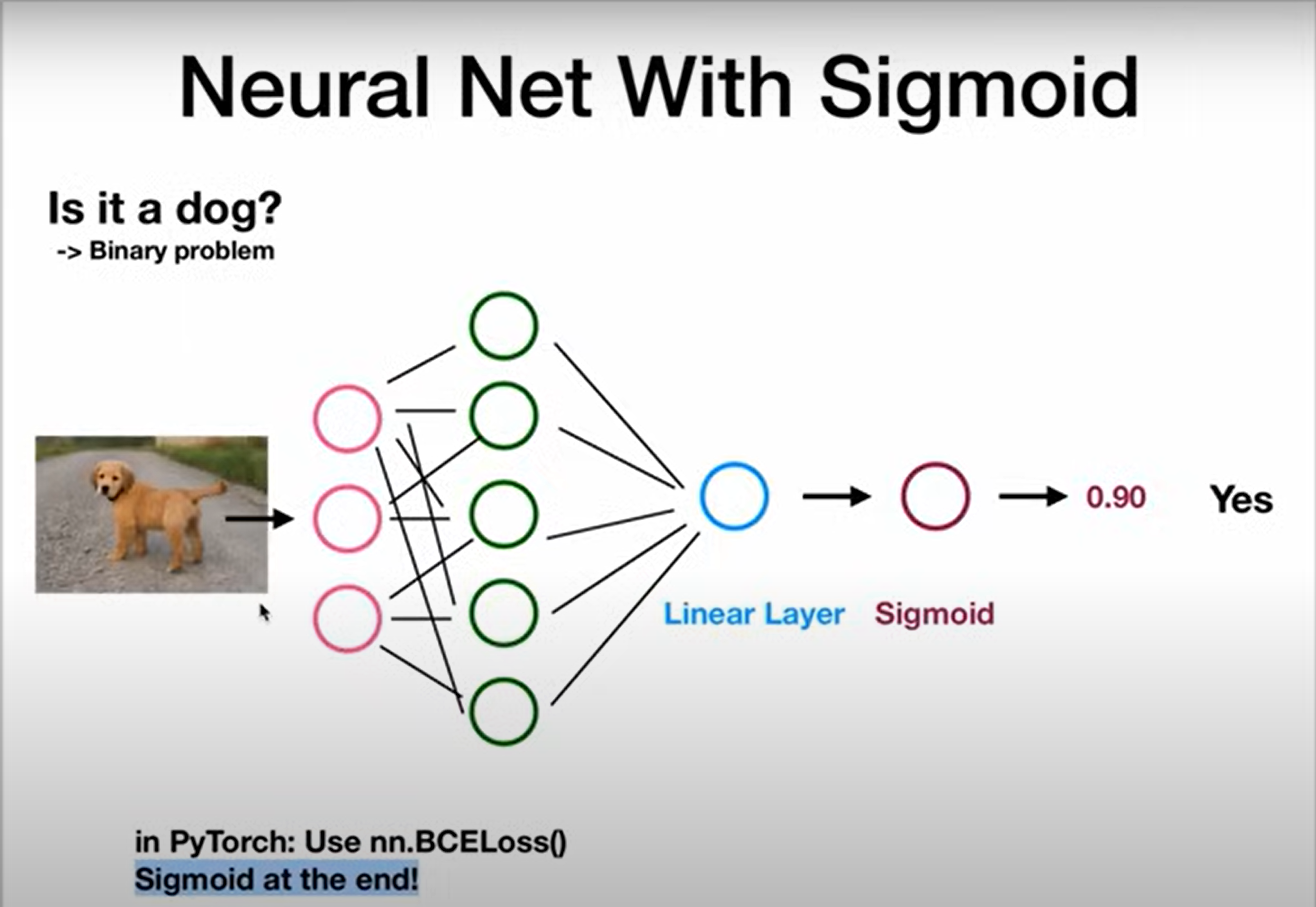

In [ ]:
# Binary Classification
class NeuralNe1(nn.Module):
  def __init__(self,input_size,hidden_Size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_Size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_Size,1)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # sigmoid at the end
    y_pred = nn.Sigmoid(out)
    return y_pred

model = NeuralNet1(input_size=28*28,hidden_Size=5)
criterion = nn.BCELoss()# applies softmax



In [ ]:
# Multiclass classification
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_Size, num_Classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_Size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_Size,num_Classes)

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax at the end

    return out

model = NeuralNet2(input_size=28*28,hidden_Size=5,num_Classes=3)
criterion = nn.CrossEntropyLoss()# applies softmax

